<a href="https://colab.research.google.com/github/FGholiejad/Pig_game/blob/master/munich_accident_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Packages
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


import pickle

In [ ]:
# Import CSV
url = 'https://www.opengov-muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv'
munich_df = pd.read_csv(url)

In [ ]:
# Select important columns
features = ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']
munich_df = munich_df[features]

# Rename the columns to english
munich_df = munich_df.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

# Data Visualization

accidents = munich_df[munich_df['Year'] < 2021]

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'Verkehrsunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'Fluchtunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'Alkoholunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['Value'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['Value'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()
    },
    index= years
)


In [ ]:
accidents_category

,Verkehrsunfälle,Fluchtunfälle,Alkoholunfälle
2020,38434.0,10024.0,430.0
2019,46010.0,11773.0,434.0
2018,46408.0,11648.0,398.0
2017,45454.0,11263.0,409.0
2016,46797.0,11179.0,301.0
2015,46635.0,11358.0,411.0
2014,46804.0,10846.0,382.0
2013,46988.0,11186.0,377.0
2012,44891.0,11105.0,440.0
2011,42114.0,10258.0,397.0


In [ ]:
accidents

,Category,Accident_Type,Year,Month,Value
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2020,202001,28.0
14,Alkoholunfälle,insgesamt,2020,202002,40.0
15,Alkoholunfälle,insgesamt,2020,202003,27.0
16,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [ ]:
munich_df

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [ ]:
pd.value_counts(munich_df.Category)

Verkehrsunfälle    855
Alkoholunfälle     570
Fluchtunfälle      570
Name: Category, dtype: int64

In [ ]:
pd.value_counts(munich_df.Accident_Type)

insgesamt                 855
Verletzte und Getötete    855
mit Personenschäden       285
Name: Accident_Type, dtype: int64

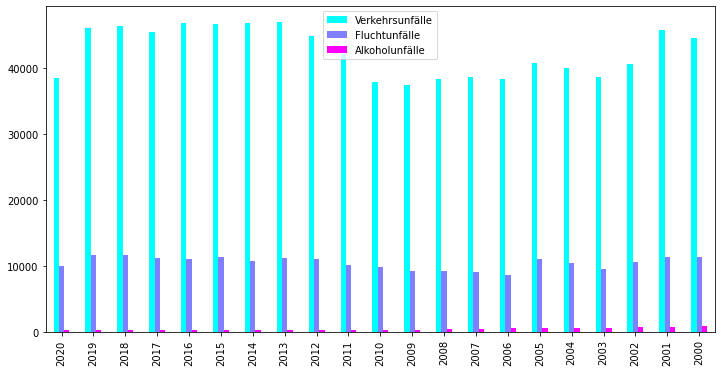

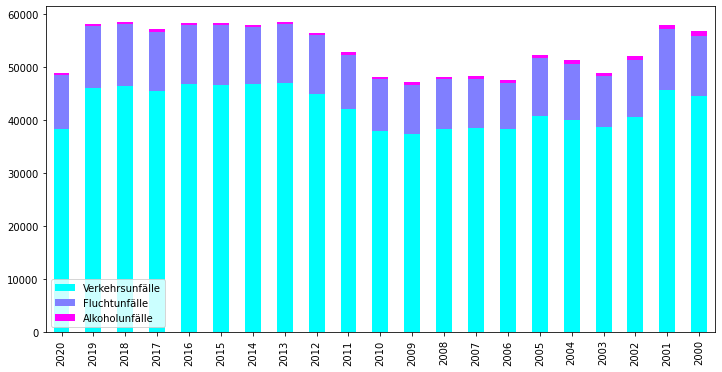

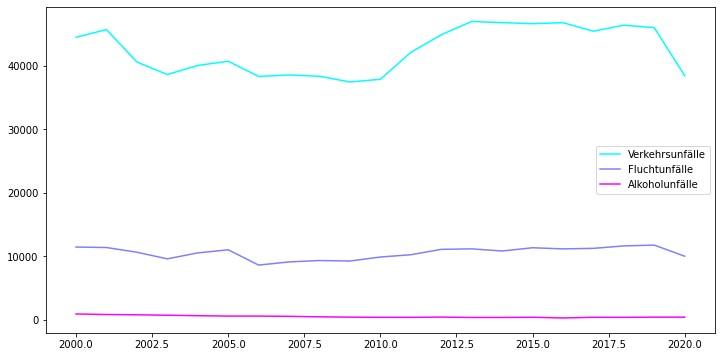

In [ ]:
# charts
accidents_category.plot(kind='bar', figsize=(12,6), colormap='cool')
accidents_category.plot(kind='bar', stacked= True, figsize=(12,6), colormap='cool')
accidents_category.plot(figsize=(12,6), colormap='cool');

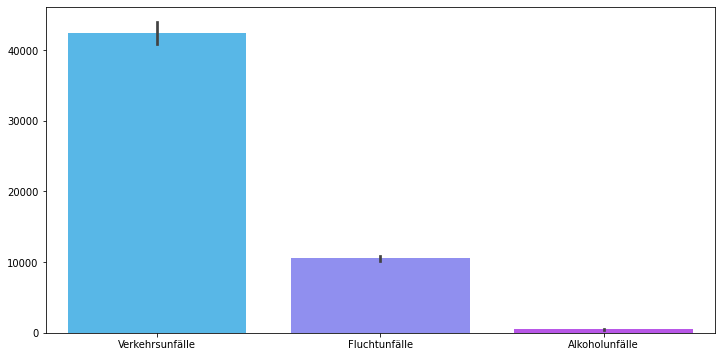

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=accidents_category, palette='cool');

In [ ]:
munich_df.Value.isna().sum()

84

In [ ]:
# Drop NaN values
munich_df = munich_df.dropna()

In [ ]:
munich_df

,Category,Accident_Type,Year,Month,Value
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2020,202001,28.0
14,Alkoholunfälle,insgesamt,2020,202002,40.0
15,Alkoholunfälle,insgesamt,2020,202003,27.0
16,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [ ]:
# Remove the 'Summe' from Month column 
munich_df = munich_df[munich_df['Month'] != 'Summe']

In [ ]:
# Get only month numbers in Month column
munich_df['Month'] = munich_df['Month'].str[-2:]

# Get only Year numbers in Month column
munich_df['Month'] = munich_df['Month'].str[-2:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
munich_df

,Category,Accident_Type,Year,Month,Value
13,Alkoholunfälle,insgesamt,2020,01,28.0
14,Alkoholunfälle,insgesamt,2020,02,40.0
15,Alkoholunfälle,insgesamt,2020,03,27.0
16,Alkoholunfälle,insgesamt,2020,04,26.0
17,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,08,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,09,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


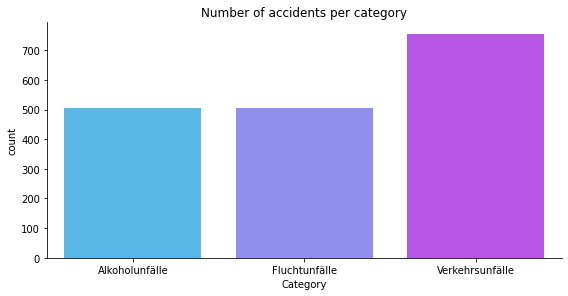

In [ ]:
# Plot Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=munich_df, palette="cool", height=4, aspect=2)
plt.title('Number of accidents per category');

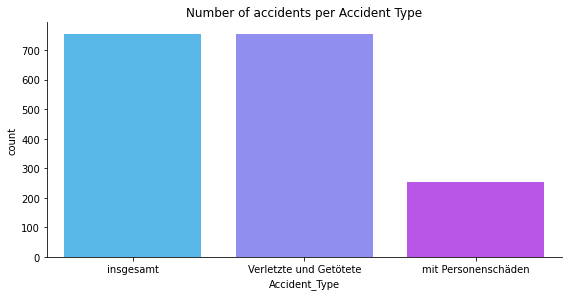

In [ ]:
# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=munich_df, palette="cool", height=4, aspect=2)
plt.title('Number of accidents per Accident Type');

In [ ]:
munich_df

,Category,Accident_Type,Year,Month,Value
13,Alkoholunfälle,insgesamt,2020,01,28.0
14,Alkoholunfälle,insgesamt,2020,02,40.0
15,Alkoholunfälle,insgesamt,2020,03,27.0
16,Alkoholunfälle,insgesamt,2020,04,26.0
17,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,08,647.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,09,675.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,10,615.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,11,578.0


In [ ]:
# Specif train and train data 
features = ['Category', 'Accident_Type', 'Year','Month']
X = munich_df[features]
y = munich_df.Value

In [ ]:
# One hot encoding -> 'Accident_Type' and 'Categories'
X_accident = pd.get_dummies(X.Accident_Type)
X_category = pd.get_dummies(X.Category)
X = pd.concat([X_accident, X], axis=1)
X = pd.concat([X_category, X], axis=1)

In [ ]:
X

,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle,Verletzte und Getötete,insgesamt,mit Personenschäden,Category,Accident_Type,Year,Month
13,1,0,0,0,1,0,Alkoholunfälle,insgesamt,2020,01
14,1,0,0,0,1,0,Alkoholunfälle,insgesamt,2020,02
15,1,0,0,0,1,0,Alkoholunfälle,insgesamt,2020,03
16,1,0,0,0,1,0,Alkoholunfälle,insgesamt,2020,04
17,1,0,0,0,1,0,Alkoholunfälle,insgesamt,2020,05
...,...,...,...,...,...,...,...,...,...,...
1990,0,0,1,1,0,0,Verkehrsunfälle,Verletzte und Getötete,2000,08
1991,0,0,1,1,0,0,Verkehrsunfälle,Verletzte und Getötete,2000,09
1992,0,0,1,1,0,0,Verkehrsunfälle,Verletzte und Getötete,2000,10
1993,0,0,1,1,0,0,Verkehrsunfälle,Verletzte und Getötete,2000,11


In [ ]:
# Drop first 2 columns
X.drop(['Category', 'Accident_Type'], 
        axis=1, 
        inplace=True)

In [ ]:
X

,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle,Verletzte und Getötete,insgesamt,mit Personenschäden,Year,Month
13,1,0,0,0,1,0,2020,01
14,1,0,0,0,1,0,2020,02
15,1,0,0,0,1,0,2020,03
16,1,0,0,0,1,0,2020,04
17,1,0,0,0,1,0,2020,05
...,...,...,...,...,...,...,...,...
1990,0,0,1,1,0,0,2000,08
1991,0,0,1,1,0,0,2000,09
1992,0,0,1,1,0,0,2000,10
1993,0,0,1,1,0,0,2000,11


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
accuracy = reg.score(X_test, y_test)
accuracy

0.7527214635183055

In [ ]:
def prediction(category, Type, year, month):		
  if category == 'Alkoholunfälle':
    if Type == 'Verletzte und Getötete':
      return reg.predict([1, 0, 0, 1, 0, 0, year, month])
    if Type == 'insgesamt':
      return reg.predict([1, 0, 0, 0, 1, 0, year, month])
    if Type == 'mit Personenschäden':
      return reg.predict([1, 0, 0, 0, 0, 1, year, month])
  if category == 'Fluchtunfälle':
    if Type == 'Verletzte und Getötete':
      return reg.predict([1, 0, 0, 1, 0, 0, year, month])
    if Type == 'insgesamt':
      return reg.predict([1, 0, 0, 0, 1, 0, year, month])
    if Type == 'mit Personenschäden':
      return reg.predict([1, 0, 0, 0, 0, 1, year, month])
  if category == 'Verkehrsunfälle':
    if Type == 'Verletzte und Getötete':
      return reg.predict([1, 0, 0, 1, 0, 0, year, month])
    if Type == 'insgesamt':
      return reg.predict([1, 0, 0, 0, 1, 0, year, month])
    if Type == 'mit Personenschäden':
      return reg.predict([1, 0, 0, 0, 0, 1, year, month])


In [ ]:
# Save the model
model_filename = 'dps_challange'
print("Saving model to {}...".format(model_filename))
joblib.dump(reg, model_filename)

Saving model to dps_challange...


['dps_challange']

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
MODEL = joblib.load('dps_challange')

@app.route('/predict')
def predict():
    # Retrieve query parameters related to this request.
    Category = request.args.get('category')
    Type = request.args.get('type')
    Year = request.args.get('year')
    Month = request.args.get('month')

    # Our model expects a list of records
    features = [Category, Type, Year, Month]
    
    # Use the model to predict the class
    label_index = MODEL.prediction(features)
    # Retrieve the iris name that is associated with the predicted class
    #label = MODEL_LABELS[label_index[0]]
    # Create and send a response to the API caller
    return jsonify(status='complete', label=label_index)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored